<div class="alert alert-block alert-info">
    
<h1 style="color:Blue;"> <center> <ins> <b> 
Métodos Numéricos 
</b> </ins> </center> </h1>
    
<h3 style="color:Blue;"> <center> <b> 
Método do Ponto Fixo
</b></center> </h3>
    
</div>

In [11]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info" style="color:Blue;">
O Que São Pontos Fixos?
</div>

No método da bisseção, no qual escolhíamos um dado intervalo e, a partir dele,
íamos nos aproximando da raiz a cada iteração, até encontrar uma aproximação que fosse
aceitável de acordo com os critérios de parada adotados.

Nessa sessão veremos um conjunto de métodos, ditos abertos, baseados em fórmulas
que testa um ou dois valores específicos, que não necessariamente limitam a raiz. Esses
valores são chamados de __pontos fixos__.

A grande vantagem desses métodos é a convergência mais rápida, se comparados
com o método da bisseção. Porém, diferente desse, não existe garantia de convergência,
podendo, em alguns casos, que os cálculos divirjam, sendo levados para valores longe da
raiz da equação avaliada.

__Mas o que é um ponto fixo?__

Pontos fixos são pontos de uma função que não são alterados por uma aplicação, isto é, pontos em que $y = f(x) = x$.

Visualmente, pode-se identificar esses pontos, para funções univariadas, traçando-se a reta em que $f(x) = x$ e verificando os pontos em que essa reta corta a curva da função $f(x)$, como mostrado na exemplo a seguir.

---
__Exemplo 1__

Seja uma função definida como $f(x) = x^3$. Encontre todos os pontos fixos dessa função por inspeção gráfica.

---

Por tentativa e erro é fácil verificar que $x = 0$, $x = 1$ e $x = -1$ são pontos fixos dessa função, pois satisfazem $f(x) = x$. Mas existem mais pontos fixos reais para essa função?

Essa dúvida pode ser sanada pela inspeção do gráfico da função sobreposto pelo gráfico da reta $f(x) = x$.

In [12]:
f1 = lambda x: x**3
f2 = lambda x: x

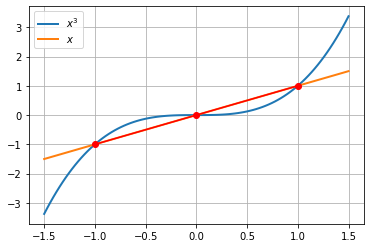

In [13]:
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f1(x), linewidth=2, label="$x^3$")
plt.plot(x, f2(x), linewidth=2, label="$x$")

plt.plot([-1, 0, 1], [f1(-1), f1(0), f1(1)], color='r', marker='o')

plt.grid()
plt.legend()

<div class="alert alert-block alert-info" style="color:Blue;">
O Método da Iteração de Ponto Fixo
</div>

Esse conceito de pontos fixos nos fornece um método aberto para encontrar a raiz de uma equação não linear (um valor inicial é avaliado para uma fórmula específica, de acordo com cada método, e, após uma certa quantidade de iterações, se encontra o valor da raiz), que nós chamaremos carinhosamente de __Método da Iteração de Ponto Fixo__. A literatura apresenta outras nomenclaturas, mas essa é, tipicamente, a mais utilizada.

O método, em linhas bem gerais, se baseia no _método do ponto fixo de Banach_ (tipicamente visto em disciplinas de análise real e funcional, cuja complexidade e escopo fogem ao esperado para essa disciplina), que nos diz que, a partir de uma sequência de valores $x_0, x_1, x_2, \ldots, x_n$ é
possível determinar o valor do ponto fixo $p$, de forma iterativa, considerando que

$$
\lim_{n\to\infty} x_n = p
$$

isto é, se obtivermos iterativamente valores de $x$ que satisfaçam a condição de ponto fixo mostrada a pouco, esse valor tenderá a ser o ponto fixo da função à medida que o número de iterações tende ao infinito.

Assim, tomando o valor inicial $x_0$ como o valor a ser considerado na primeira iteração,
podemos estimar cada valor do(s) ponto(s) fixo(s), de forma iterativa, da seguinte forma

$$
x_{i+1} = g(x_i)
$$

garantindo, pelo resultado descrito acima, que se o número de iterações for suficiente
(atender ao critério de parada estabelecido), a k-ésima iteração terá o valor do ponto fixo
desejado.

Obviamente, não podemos encontrar com exatidão, uma vez que não conseguimos realizar, de fato, infinitas iterações. Ou seja, temos de estabelecer um critério de parada que, tipicamente, será o nosso erro relativo tolarável, do mesmo modo que trabalhamos na bisseção.

__Tá, mas como o ponto fixo pode resolver o problema de encontrar as raízes da equação $f(x) = 0$ ?__

Na primeira aula desse conteúdo, nós discutimos justamente o arranjo desse problema. Basta lembrarmos que, se fizermos $f(x) = g(x) - x = x - g(x)$, automaticamente um problema se rearranja no outro! O exemplo a seguir ilustra justamente essa situação!

---
__Exemplo 2__

Considere a equação $x^2 - 2x +3 = 0$. Qual a função $g(x)$ a ser usada pelo método do ponto fixo para a busca da raiz?

---

A forma mais simples que temos é obtida pelo isolamento de $x$. Dessa forma, temos

$$
x^2 - 2x +3 = 0~~~~\Rightarrow~~~~x(x - 2) = -3~~~~\Rightarrow~~~~x = \dfrac{-3}{x - 2} = g(x)
$$

É interessante perceber que essa mesma relação poderia ser escrita de outra forma, como 

$$
x^2 - 2x +3 = 0~~~~\Rightarrow~~~~ x^2 +3 = 2x ~~~~\Rightarrow~~~~ x = \dfrac{x^2 +3}{2} = g(x)
$$

Temos, então, duas possíveis expressões. Mas, qual escolher?

Nesse caso precisamos atentar para limitações que cada arranjo da função possui. Na primeira, temos a limitação de que, se $x_i = 2$, encontraremos uma divergência, pois $x_{\infty} = \infty$ (o denominador zera). Logo, para eviter esse erro de divergência, é mais interessante trabalhar com a segunda opção, que não terá essa divergência.


---
__Exemplo 3__

Considere a equação $\sin(x) = 0$. Qual a função $g(x)$ que devemos considerar para usar no método do ponto fixo?

---

Nesse caso, temos uma função que não podemos isolar o $x$ como fizemos no exemplo anterior. Então o que fazer? Simples! Somar $x$ em ambos os termos, de forma que

$$
x = \sin(x) + x = g(x)
$$

<div class="alert alert-block alert-info" style="color:Blue;">
Método do Ponto Fixo no Python
</div> 

Como dito no material sobre método da bisseção, as funções que implementam
métodos de localização de raízes em equações estão localizadas no submódulo `optimize` e, olhando a documentação, é possível ver que existe uma função `fixed_point` que calcula o ponto fixo de uma função. Vemos também que, diferente do método anterior, esse não consta como um dos métodos considerados pela função `root_scalar`.

Olhando a [documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html), é possível ver que a função `fixed_point` possui dois
parâmetros obrigatórios: 

* __func__, a função a ser avaliada g(x), e 
* __x0__, o valor inicial para início das iterações. 

Vamos ver como ela trabalha a partir de um exemplo.

---
__Exemplo 4__

Calcule a raiz da equação $e^{-x} - x = 0$ pelo método da iteração do ponto fixo, com valor inicial $x_0 = 0$.

---

Nesse exemplo, podemos fazer $e^{-x} = x$ e, então, teremos $g(x) = e^{-x}$ e, para o método da iteração de ponto fixo, teríamos

$$
x_{i+1} = e^{-x_i}
$$

Para usar a função `fixed_point`, precisamos, antes de tudo, definir nossa função $g(x)$:

In [14]:
g = lambda x: np.exp(-x)

Para fins de comparação, vamos fazer os cálculos de cada iteração "na mão", para entendermos, inclusive o processo:

$$
x_{i+1} = g(x_i) = e^{-x_i}
$$

1. $x_1 = e^{-x_0} = e^{0} = 1.0$
2. $x_2 = e^{-x_1} = e^{-1} = 0.368$
3. $x_3 = e^{-x_2} = e^{-0.368} = 0.692$
4. $x_4 = e^{-x_3} = e^{-0.692} = 0.5$
5. $x_5 = e^{-x_4} = e^{-0.5} = 0.606$
6. $x_6 = e^{-x_5} = e^{-0.606} = 0.545$
7. $x_7 = e^{-x_6} = e^{-0.545} = 0.580$


E, então, é só entrar com os parâmetros da função

In [15]:
opt.fixed_point(g, x0=0)

array(0.56714329)

 Obviamente, após explorar a documentação, nos deparamos com outros parâmetros que podem ser úteis.

Além desses argumentos, obrigatórios, existem também os argumentos `xtol`, que define a tolerância ou precisão esperada como critério de parada e `maxiter`, que define o
número máximo de iterações, similares ao que vimos no método da bisseção. Dessa forma, se avaliarmos a função com tolerância de $10^{-1}$, obteremos

In [16]:
opt.fixed_point(g, x0=0, xtol = 1e-1)

array(0.56735086)

In [17]:
opt.fixed_point(g, x0=0, maxiter=7)

array(0.56714329)

Ao conferir esses resultados com os calculados manualmente, algo estranho nos
aparece: não existe esse valor em nenhuma iteração. Isso, obviamente, tem explicação.

Além desses parâmetros já discutidos, na documentação, há o parâmetro `method`, que aceita dois possíveis valores: `’del2’`, o valor _default_, que habilita a função a trabalhar com uma variante do método
que leva à uma aceleração de convergência, chamado de método de Steffensen (esse método é descrito em alguns livros de Análise Numérica, como o famoso livro do Burden; nesse curso, não intencionamos discutí-lo.) e `’iteration’`, que faz com que a função simplesmente faça as iterações como fizemos "na mão".

De fato, se fizermos

In [18]:
opt.fixed_point(g, x0=0, xtol = 1e-1, method='iteration')

0.5796123355033789

veremos que o valor é igual (desconta as aproximações) ao obtido na sétima iteração mostrada acima.

O parâmetro `maxiter` funciona de forma similar à
função `root_scalar`, não havendo necessidade de maior discussão, salvo o alerta de que,
caso o número de iterações escolhidos acabe antes do método convergir.

Por exemplo, se ajustarmos como critério para parada 7 iterações, com a tolerância de $10^{−1}$ , obteremos o resultado, justamente porque essa tolerância é alcançada na 7a iteração.

In [19]:
opt.fixed_point(g, x0=0, xtol = 1e-1, method='iteration', maxiter=7)

0.5796123355033789

Porém, se limitarmos a 5 iterações, teremos

In [20]:
opt.fixed_point(g, x0=0, xtol = 1e-1, method='iteration', maxiter=5)

RuntimeError: Failed to converge after 5 iterations, value is 0.6062435350855974

Mesmo assim, apesar disso, na mensagem de erro é possível ver o valor obtido na
última iteração.